# EDA Revision

In [4]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
cars=pd.read_csv("Cars_T341.csv")
cars

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  202 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.2+ KB


# Simple Imputer

In [6]:
cars.isnull().sum()

symboling            0
normalized-losses    3
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [7]:
cars["normalized-losses"].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       nan, '110', '145', '137', '101', '78', '106', '85', '107', '104',
       '113', '150', '129', '115', '93', '142', '161', '153', '125',
       '128', '122', '103', '168', '108', '194', '231', '119', '154',
       '74', '186', '83', '102', '89', '87', '77', '91', '134', '65',
       '197', '90', '94', '256', '95'], dtype=object)

In [8]:
list_null_cols=list(cars.isnull().sum()[cars.isnull().sum()>0].index)
list_null_cols

['normalized-losses']

In [9]:
cars.replace("?",np.nan,inplace=True)
cars

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,NaN,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,NaN,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


In [12]:
cars.describe()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


In [13]:
cars["normalized-losses"]=cars["normalized-losses"].astype(float)
cars["normalized-losses"].unique()

array([ nan, 164., 158., 192., 188., 121.,  98.,  81., 118., 148., 110.,
       145., 137., 101.,  78., 106.,  85., 107., 104., 113., 150., 129.,
       115.,  93., 142., 161., 153., 125., 128., 122., 103., 168., 108.,
       194., 231., 119., 154.,  74., 186.,  83., 102.,  89.,  87.,  77.,
        91., 134.,  65., 197.,  90.,  94., 256.,  95.])

In [14]:
cars.describe()

,symboling,normalized-losses,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,161.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,121.894410,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,35.524745,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,65.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,115.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,150.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


In [15]:
list_null_cols=list(cars.isnull().sum()[cars.isnull().sum()>0].index)
list_null_cols

['normalized-losses', 'horsepower']

In [17]:
a=cars["normalized-losses"].mean()
a

np.float64(121.8944099378882)

In [18]:
cars["normalized-losses"].replace(np.nan,a,inplace=True)

In [19]:
cars["normalized-losses"].unique()

array([121.89440994, 164.        , 158.        , 192.        ,
       188.        , 121.        ,  98.        ,  81.        ,
       118.        , 148.        , 110.        , 145.        ,
       137.        , 101.        ,  78.        , 106.        ,
        85.        , 107.        , 104.        , 113.        ,
       150.        , 129.        , 115.        ,  93.        ,
       142.        , 161.        , 153.        , 125.        ,
       128.        , 122.        , 103.        , 168.        ,
       108.        , 194.        , 231.        , 119.        ,
       154.        ,  74.        , 186.        ,  83.        ,
       102.        ,  89.        ,  87.        ,  77.        ,
        91.        , 134.        ,  65.        , 197.        ,
        90.        ,  94.        , 256.        ,  95.        ])

In [21]:
cars["horsepower"].replace("?",np.nan,inplace=True)
cars["horsepower"]=cars["horsepower"].astype(float)
hpmean=cars["horsepower"].mean()
cars["horsepower"].fillna(hpmean)

0      111.0
1      111.0
2      154.0
3      102.0
4      115.0
       ...  
200    114.0
201    160.0
202    134.0
203    106.0
204    114.0
Name: horsepower, Length: 205, dtype: float64

In [22]:
cars["horsepower"].unique()

array([111., 154., 102., 115., 110., 140., 160., 101., 121., 182.,  48.,
        70.,  68.,  88., 145.,  58.,  76.,  60.,  86., 100.,  78.,  90.,
       176., 262., 135.,  84.,  64., 120.,  72., 123., 155., 184., 175.,
       116.,  69.,  55.,  97., 152., 200.,  95., 142., 143., 207., 288.,
        nan,  73.,  82.,  94.,  62.,  56., 112.,  92., 161., 156.,  52.,
        85., 114., 162., 134., 106.])

# Outliers

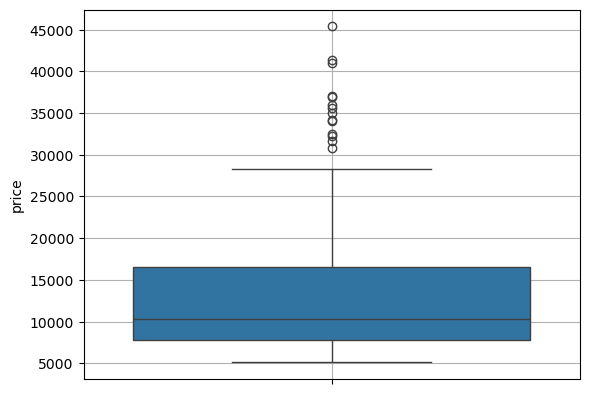

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(y=cars["price"])
plt.grid()

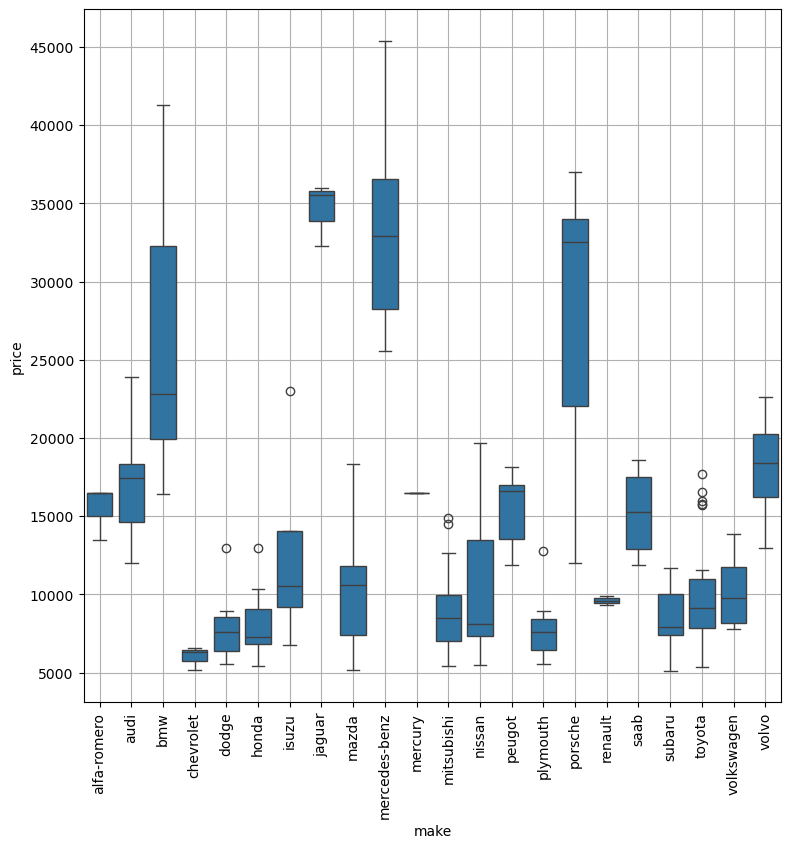

In [26]:
plt.figure(figsize=(9,9))
sns.boxplot(y=cars["price"],x=cars["make"])
plt.xticks(rotation=90)
plt.grid()

In [27]:
cars[(cars["make"]=="dodge") & (cars["price"]>=10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
29,3,145.0,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,12964


In [28]:
cars[(cars["make"]=="toyota") & (cars["price"]>=15000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
172,2,134.00000,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116.0,24,30,17669
178,3,197.00000,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,20,24,16558
179,3,197.00000,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,19,24,15998
180,-1,90.00000,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,156.0,20,24,15690
181,-1,121.89441,toyota,gas,wagon,rwd,front,66.5,54.1,dohc,161,156.0,19,24,15750


In [29]:
Dodge_outliar=cars[(cars["make"]=="dodge") & (cars["price"]>=10000)].index
cars.drop(index=Dodge_outliar,inplace=True)
Dodge_outliar

Index([29], dtype='int64')

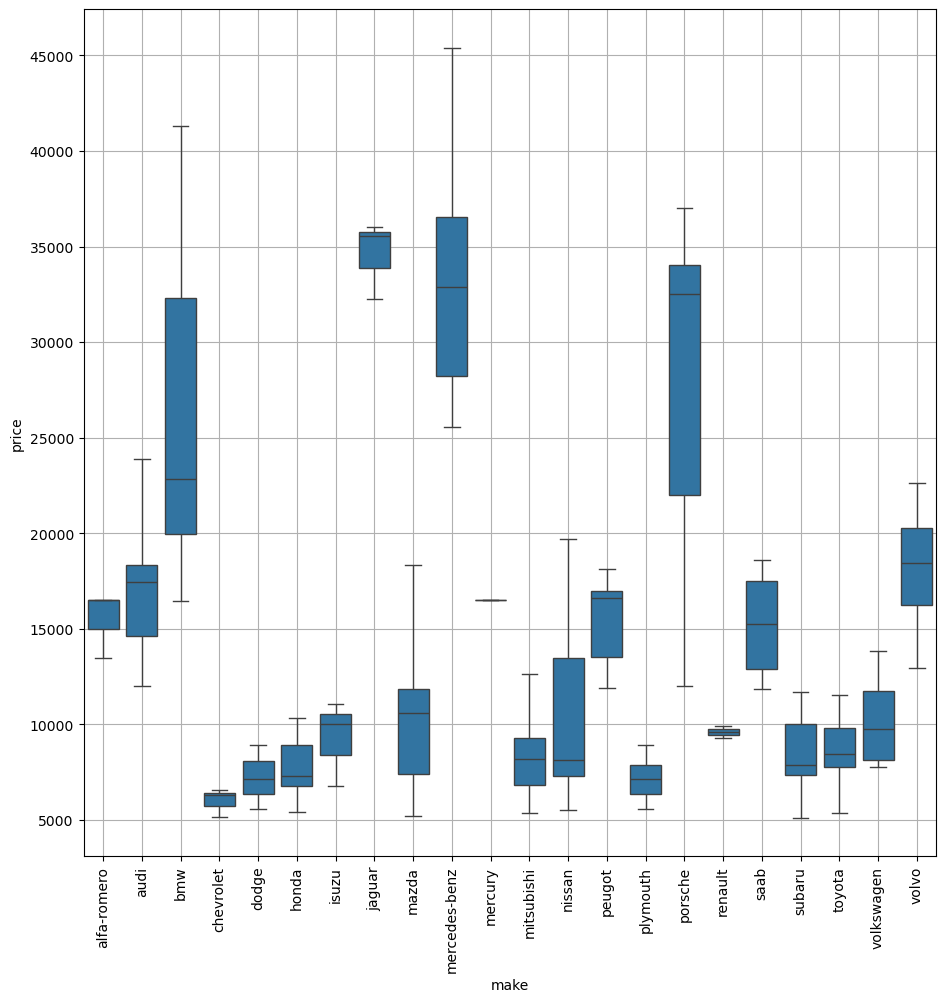

In [36]:
plt.figure(figsize=(11,11))
sns.boxplot(y=cars["price"],x=cars["make"])
plt.xticks(rotation=90)
plt.grid()

In [31]:
Dodge_outliar=cars[(cars["make"]=="toyota") & (cars["price"]>=15000)].index
cars.drop(index=Dodge_outliar,inplace=True)
Dodge_outliar

Index([172, 178, 179, 180, 181], dtype='int64')

In [33]:
cars_with_outliars=["dodge","honda","isuzu","mitsubishi","plymouth","toyota"]
price_limits=[10000,12000,20000,13000,10000,15000]
for i in range(0,len(cars_with_outliars)):
    Outliars=cars[(cars["make"]==cars_with_outliars[i]) & (cars["price"]>=price_limits[i])].index
    cars.drop(index=Outliars,inplace=True)